# このNotebookの目的
　- bostonのデータを使用した統計解析手法の勉強
 
 
## 調べる項目
 **データ分析の目的**
 
 **データの内容**
 
  - データ数
  - 変数の数
   - 各変数の意味
   - 基本統計量
  - 欠損の有無 
 
**変数同士の関係**
 
  - 散布図
  - 層別の分析
  - 変数同士の関係性
 
 
## 仮説

  - CRIM LSTATの変数を使用すると、住宅価格の平均値が高い物件は予想できると考えられる
  - 部屋数と住宅価格には相関があるので住宅価格の予想に使用できると考えた
  - TAXが高い物件に住宅価格の安い物件が固まっていることから予測に使用できると考えた


## 共有

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データの読み込み

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## このデータについて
     データの目的 特徴量から住宅価格を予想する

     506行のボストンの家賃データ
     
     目的変数MEDVは住宅価格の中央値(1000ドル単位)
     
     一つのデータにつき変数は13個
      - CRIM     : 一人当たりの犯罪発生率
      - ZN     　: 25,000平方フィートを超える区画に区画化された住宅地の割合
      - INDUS 　 : 小売業以外の商業が占める面積の割合
      - CHAS 　　: チャールズ側に接しているか（接している:1, それ以外:0)
      - NOX 　　 : 一酸化窒素の濃度　（1000万分の1）
      - RM       : 平均部屋数
      - AGE      : 1940 年より前に建てられた物件の割合
      - DIS    　: 5 つのボストン市の雇用施設からの距離 
      - RAD      : 環状高速道路へのアクセスしやすさ
      - TAX  　　: 10,000ドルごとの固定資産税率
      - PTRATIO  : 町ごとの生徒と教師の比率
      - B        : 町ごとの黒人の割合 1000(Bk - 0.63)^2 
      - LSTAT    : 低所得者の割合    
    

## よくある基礎的な分析
**気付いたこと**

 - データに欠けはない。
 - CRIM(犯罪発生率)に88％のデータがあり、外れ値の可能性がある。
 - AGE(1940 年より前に建てられた物件の割合)に100％のデータあり、外れ値の可能性がある。

In [3]:
# 集計操作をやりやすくするための処理

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["MEDV"] = np.array(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## カラムごとのデータ

### MEDV
**気付いたこと**

- ほとんどのデータが40以下で固まっているため、何か40以上になる要因を識別できれば予測の役に立つと思えた。
- 20付近で大きな山になっていることからその値と関係する変数を見つければ、予測に使えると考えられた。

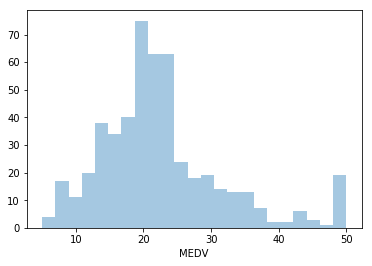

In [6]:
sns.distplot(df["MEDV"], kde=False)

### CRIM
**気付いたこと**

- 犯罪発生率が極端に高いデータがいくつかあり、判別が難しくなった

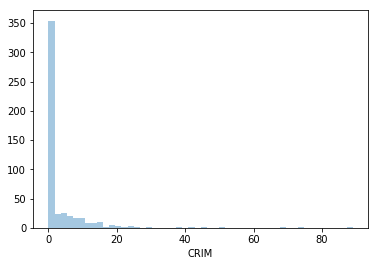

In [7]:
sns.distplot(df["CRIM"], kde=False)

### AGE
**気付いたこと**

-  築年数が古い建物が多く、外れ値の可能性はなくなった

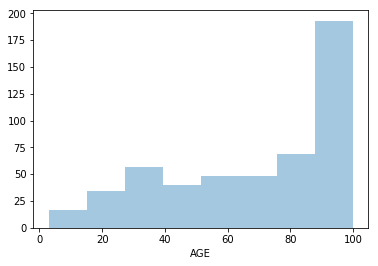

In [8]:
sns.distplot(df["AGE"], kde=False)

## 複数のカラムの関係性を見る（MEDVとの関係）

**重要だと思われるカラム**


  - CRIM  : 犯罪発生率が低いほど住宅価格は高くなる
  - NOX   : 住宅価格の高い物件はNOXが0.7以下
  - TAX   : 20を超える物件に住宅価格が10以下の物件が固まっている
  - RAD   : 20を超える物件に住宅価格が10以下の物件が集まっている
  - LSTAT : 低所得者の割合が低いほど住宅価格は高くなる
  - RM    : 部屋数と住宅価格には正の相関があり、予測に使用できる

### CRIMとMEDV

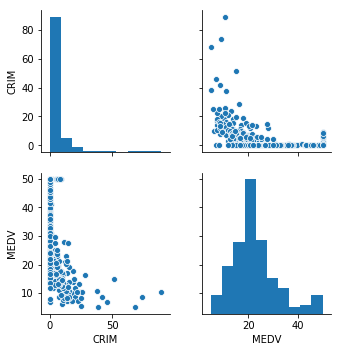

In [9]:
sns.pairplot(df[["CRIM", "MEDV"]])

### ZNとMEDV

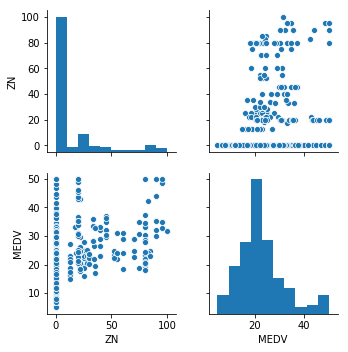

In [10]:
sns.pairplot(df[["ZN", "MEDV"]])

### INDUSとMEDV

In [ ]:
sns.pairplot(df[["INDUS", "MEDV"]])

### CHASとMEDV

In [ ]:
sns.pairplot(df[["CHAS", "MEDV"]])

### NOXとMEDV

In [ ]:
sns.pairplot(df[["NOX", "MEDV"]])

### RMとMEDV

In [ ]:
sns.pairplot(df[["RM", "MEDV"]])

### AGEとMEDV

In [ ]:
sns.pairplot(df[["AGE", "MEDV"]])

### DISとMEDV

In [ ]:
sns.pairplot(df[["DIS", "MEDV"]])

### RADとMEDV

In [ ]:
sns.pairplot(df[["RAD", "MEDV"]])

### TAXとMEDV

In [ ]:
sns.pairplot(df[["TAX", "MEDV"]])

### PTRATIOとMEDV

In [ ]:
sns.pairplot(df[["PTRATIO", "MEDV"]])

### BとMEDV

In [ ]:
sns.pairplot(df[["B", "MEDV"]])

### LSTATとMEDV

In [ ]:
sns.pairplot(df[["LSTAT", "MEDV"]])

In [ ]:
sns.pairplot(df[["ZN", "INDUS"]])

##  ピアソンの相関係数

In [ ]:
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, annot=True, fmt=".1f")